In [58]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [60]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


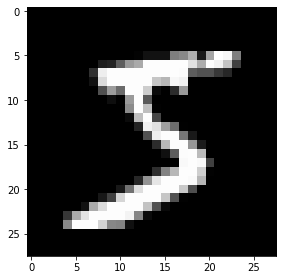

In [61]:
import skimage.io as io
io.imshow(x_train[0]) 

In [62]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 32)        36896     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 800)               0         
                                                                 
 dropout_10 (Dropout)        (None, 800)             

In [63]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [64]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 0.4418 - accuracy: 0.8593 - val_loss: 0.1063 - val_accuracy: 0.9696
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1423 - accuracy: 0.9551 - val_loss: 0.0738 - val_accuracy: 0.9793
Epoch 3/100
375/375 [==============================] - 3s 9ms/step - loss: 0.1048 - accuracy: 0.9679 - val_loss: 0.0574 - val_accuracy: 0.9835
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0893 - accuracy: 0.9726 - val_loss: 0.0507 - val_accuracy: 0.9854
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0794 - accuracy: 0.9751 - val_loss: 0.0484 - val_accuracy: 0.9860
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0727 - accuracy: 0.9775 - val_loss: 0.0467 - val_accuracy: 0.9863
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0453 - val_accuracy: 0.9875

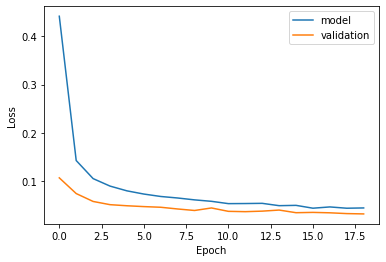

In [65]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

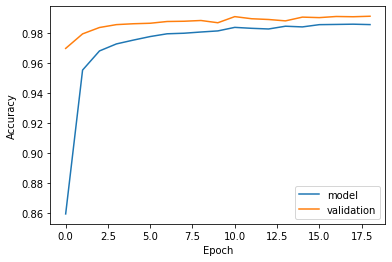

In [66]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()